In [204]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import math
from qiskit import QuantumRegister
from qiskit.circuit import AncillaQubit
from qiskit.circuit.library import GroverOperator, MCMT, ZGate

In [205]:
# Create a quantum circuit
qc = QuantumCircuit(3,3)

# Create a quantum register for the ancilla qubit
ancilla_register = QuantumRegister(1, 'ancilla')

# Add the ancilla register to the quantum circuit
qc.add_register(ancilla_register)

# Create an ancilla qubit using the AncillaQubit class
ancilla_qubit = AncillaQubit(ancilla_register, 0)

# Apply Not-gate to ancilla qubit
qc.x(3)
qc.barrier(0,1,2,3)

# Apply Hadamard gates to all qubits (including the ancilla qubit)
qc.h(range(4))

# Draw the circuit
qc.draw()


░ ┌───┐
    q_0: ──────░─┤ H ├
               ░ ├───┤
    q_1: ──────░─┤ H ├
               ░ ├───┤
    q_2: ──────░─┤ H ├
         ┌───┐ ░ ├───┤
ancilla: ┤ X ├─░─┤ H ├
         └───┘ ░ └───┘
    c: 3/═════════════

In [206]:
def boolean_oracle(qc):
    # Applying X gate to qubit 0 and qubit 2 for the target state |010⟩ => |111⟩
    qc.x(0)
    qc.x(2)
    qc.compose(MCMT('cx', 3, 1), inplace=True)
    qc.x(0)
    qc.x(2)
    return qc

In [207]:
def diffusion_with_auxiliary(qc):
    # Step 1: Apply Hadamard gates to all qubits and the auxiliary qubit
    qc.h(range(4))

    # Step 2: Apply an X gate to all qubits and not the auxiliary qubit
    qc.x(range(3))

    # Step 3: Apply a multi-controlled Z gate
    qc.compose(MCMT(ZGate(), 2, 1), inplace=True)

    # Step 4: Apply an X gate to the auxiliary qubit again
    qc.x(range(3))

    # Step 5: Apply Hadamard gates to all qubits and not the auxiliary qubit
    qc.h(range(3))

    return qc


In [208]:
optimal_num_iterations = math.floor(
    math.pi / 4 * math.sqrt(8)
)

In [209]:
for num in range(optimal_num_iterations):
    boolean_oracle(qc)
    qc.barrier(0,1,2,3)
    diffusion_with_auxiliary(qc)
    qc.barrier(0,1,2,3)
    num += 1

qc.draw()


░ ┌───┐┌───┐     ┌───┐ ░ ┌───┐┌───┐   ┌───┐┌───┐ ░ ┌───┐     »
    q_0: ──────░─┤ H ├┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤ X ├──■──»
               ░ ├───┤└───┘  │  └───┘ ░ ├───┤├───┤ │ ├───┤├───┤ ░ └───┘  │  »
    q_1: ──────░─┤ H ├───────■────────░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░────────■──»
               ░ ├───┤┌───┐  │  ┌───┐ ░ ├───┤├───┤ │ ├───┤├───┤ ░ ┌───┐  │  »
    q_2: ──────░─┤ H ├┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤ X ├──■──»
         ┌───┐ ░ ├───┤└───┘┌─┴─┐└───┘ ░ ├───┤└───┘   └───┘└───┘ ░ └───┘┌─┴─┐»
ancilla: ┤ X ├─░─┤ H ├─────┤ X ├──────░─┤ H ├───────────────────░──────┤ X ├»
         └───┘ ░ └───┘     └───┘      ░ └───┘                   ░      └───┘»
    c: 3/═══════════════════════════════════════════════════════════════════»
                                                                            »
«         ┌───┐ ░ ┌───┐┌───┐   ┌───┐┌───┐ ░ 
«    q_0: ┤ X ├─░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─
«         └───┘ ░ ├───┤├───┤ │ ├───┤├───┤ ░ 
«    q_1: ──────░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─
«         ┌───┐ ░ ├───┤├───┤ │ ├───┤├───┤ ░ 
«    q_2: ┤ X ├─░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─
«         └───┘ ░ ├───┤└───┘   └───┘└───┘ ░ 
«ancilla: ──────░─┤ H ├───────────────────░─
«               ░ └───┘                   ░ 
«    c: 3/══════════════════════════════════
«

In [210]:
qc.measure([0,1,2], [0,1,2])

In [211]:
print(qc)

               ░ ┌───┐┌───┐     ┌───┐ ░ ┌───┐┌───┐   ┌───┐┌───┐ ░ ┌───┐     »
    q_0: ──────░─┤ H ├┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤ X ├──■──»
               ░ ├───┤└───┘  │  └───┘ ░ ├───┤├───┤ │ ├───┤├───┤ ░ └───┘  │  »
    q_1: ──────░─┤ H ├───────■────────░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░────────■──»
               ░ ├───┤┌───┐  │  ┌───┐ ░ ├───┤├───┤ │ ├───┤├───┤ ░ ┌───┐  │  »
    q_2: ──────░─┤ H ├┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤ X ├──■──»
         ┌───┐ ░ ├───┤└───┘┌─┴─┐└───┘ ░ ├───┤└───┘   └───┘└───┘ ░ └───┘┌─┴─┐»
ancilla: ┤ X ├─░─┤ H ├─────┤ X ├──────░─┤ H ├───────────────────░──────┤ X ├»
         └───┘ ░ └───┘     └───┘      ░ └───┘                   ░      └───┘»
    c: 3/═══════════════════════════════════════════════════════════════════»
                                                                            »
«         ┌───┐ ░ ┌───┐┌───┐   ┌───┐┌───┐ ░ ┌─┐      
«    q_0: ┤ X ├─░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤M├──────
«         └───┘ ░ ├───┤├───┤ │ ├──

Counts: {'110': 78, '100': 74, '001': 61, '011': 63, '111': 77, '101': 66, '000': 71, '010': 534}


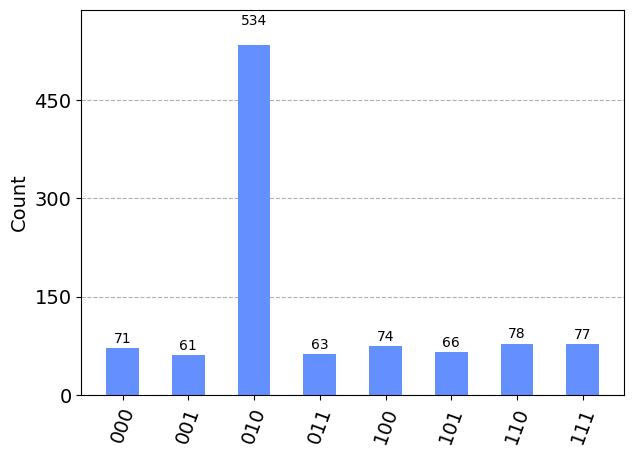

In [212]:
# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1024)
result = job.result()
counts = result.get_counts(qc)

# Plot the result
print("Counts:", counts)
plot_histogram(counts)